In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,NuSVC
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.metrics import auc,classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.ensemble import BaggingClassifier

In [42]:
df_normal = pd.read_csv('/Users/hongggenzhang/Desktop/ECG/data/data_normal_clean.csv', sep = ',')
df_normal

,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Gender,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
0,80.0,-26.0,38.0,0,70.0,3.0,8.0,34.0,453.0,144,...,-87.0,429.0,185.0,0.0,-190.0,896.0,369.0,0.0,-2298.0,1265.0
1,80.0,34.0,38.0,0,78.0,34.0,42.0,8.0,483.0,153,...,-83.0,1093.0,0.0,0.0,-219.0,1274.0,0.0,0.0,-1586.0,1274.0
2,88.0,24.0,38.0,0,86.0,15.0,59.0,35.0,430.0,136,...,-73.0,576.0,0.0,0.0,-214.0,711.0,0.0,0.0,-1092.0,711.0
3,96.0,-27.0,21.0,0,103.0,38.0,90.0,117.0,466.0,147,...,-185.0,722.0,434.0,0.0,24.0,705.0,524.0,0.0,-15.0,1229.0
4,74.0,-48.0,36.0,1,94.0,50.0,24.0,72.0,427.0,136,...,-122.0,1303.0,78.0,0.0,-126.0,1122.0,64.0,0.0,-543.0,1186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56401,60.0,24.0,9.0,0,99.0,40.0,66.0,42.0,418.0,132,...,-117.0,585.0,483.0,0.0,-439.0,362.0,334.0,0.0,-1997.0,696.0
56402,78.0,47.0,9.0,1,99.0,54.0,103.0,56.0,449.0,142,...,-92.0,0.0,278.0,615.0,-434.0,0.0,148.0,387.0,-2196.0,535.0
56403,88.0,-26.0,9.0,0,99.0,59.0,34.0,60.0,432.0,136,...,-126.0,810.0,385.0,0.0,-346.0,675.0,402.0,0.0,-1766.0,1077.0
56404,74.0,47.0,10.0,1,99.0,74.0,73.0,26.0,445.0,142,...,-146.0,1118.0,83.0,0.0,-170.0,895.0,48.0,0.0,-883.0,943.0


In [43]:
df_normal.columns[:14]

Index(['QRS_Duration__ms_C', 'R_T_Axis_deviation', 'Group', 'Gender',
       'Ventricular_Rate_C', 'P_Axis_C', 'R_Axis_C', 'T_Axis_C',
       'QTc_Calculation_C', 'QTc_Bazett_C', 'QTc_Friderica_C', 'PR_Interval_C',
       'RR_Interval_C', 'Q_T_Interval_C'],
      dtype='object')

In [44]:
#big_group = [[1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13,14],[15,16,17],[18,19,20],[21,22,23],[24,25,26,27],
             #[28,29,30,31,32,33,34,35],[36,37,38]]
#big_group = list(np.arange(1,39))

#big_group = [[1],[2,3],[4],[5],[6,7,8],[9,10,11],[12,13],[14],[15],[16],[17,18],[19,20,21,22],
             #[23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]]

big_group = [[1],[2],[3,4],[5,6],[7,8,9],[10,11,12,13],[14,15,16,17],[18,19,20,21],[22,23,24,25,26],
             [27,28,29,30,31,32,33,34,35,36,37,38]]
#[23, 19, 17, 16, 15, 14, 12, 9, 6, 5, 4, 2, 1]
#big_group = [[1],[2],[3,4],[5],[6],[7],[8],[9,10,11,12],[13,14,15,16],[17,18],[19,20,21,22,23],[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]]
#[24, 19, 17, 13, 9, 8, 7, 6, 5, 3, 2, 1]
group_dic = {}
big_group_id = 1
for group_list in big_group:
    for i in group_list:
        group_dic[i] = big_group_id
    big_group_id+=1

In [45]:
group_num = df_normal['Group'].values
new_list  = []
for i in range(len(group_num)):
    new_list.append(group_dic[int(group_num[i])])
new_df = pd.DataFrame({'Group': new_list})

In [46]:
df_normal.update(new_df)
df_normal

,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Gender,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
0,80.0,-26.0,10.0,0,70.0,3.0,8.0,34.0,453.0,144,...,-87.0,429.0,185.0,0.0,-190.0,896.0,369.0,0.0,-2298.0,1265.0
1,80.0,34.0,10.0,0,78.0,34.0,42.0,8.0,483.0,153,...,-83.0,1093.0,0.0,0.0,-219.0,1274.0,0.0,0.0,-1586.0,1274.0
2,88.0,24.0,10.0,0,86.0,15.0,59.0,35.0,430.0,136,...,-73.0,576.0,0.0,0.0,-214.0,711.0,0.0,0.0,-1092.0,711.0
3,96.0,-27.0,8.0,0,103.0,38.0,90.0,117.0,466.0,147,...,-185.0,722.0,434.0,0.0,24.0,705.0,524.0,0.0,-15.0,1229.0
4,74.0,-48.0,10.0,1,94.0,50.0,24.0,72.0,427.0,136,...,-122.0,1303.0,78.0,0.0,-126.0,1122.0,64.0,0.0,-543.0,1186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56401,60.0,24.0,5.0,0,99.0,40.0,66.0,42.0,418.0,132,...,-117.0,585.0,483.0,0.0,-439.0,362.0,334.0,0.0,-1997.0,696.0
56402,78.0,47.0,5.0,1,99.0,54.0,103.0,56.0,449.0,142,...,-92.0,0.0,278.0,615.0,-434.0,0.0,148.0,387.0,-2196.0,535.0
56403,88.0,-26.0,5.0,0,99.0,59.0,34.0,60.0,432.0,136,...,-126.0,810.0,385.0,0.0,-346.0,675.0,402.0,0.0,-1766.0,1077.0
56404,74.0,47.0,6.0,1,99.0,74.0,73.0,26.0,445.0,142,...,-146.0,1118.0,83.0,0.0,-170.0,895.0,48.0,0.0,-883.0,943.0


In [47]:
ageset = [1,2,3,4,5,6,7,8,9]
df_normal1 = df_normal.loc[df_normal['Group'].isin(ageset)]
df_normal1
#df_normal2 = df_normal[['Group'==9]].sample(frac=0.2, replace=True, random_state=1)

,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Gender,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
3,96.0,-27.0,8.0,0,103.0,38.0,90.0,117.0,466.0,147,...,-185.0,722.0,434.0,0.0,24.0,705.0,524.0,0.0,-15.0,1229.0
6,96.0,61.0,9.0,0,147.0,97.0,20.0,-41.0,519.0,165,...,-24.0,878.0,341.0,0.0,-78.0,1874.0,905.0,0.0,-420.0,2779.0
14,86.0,39.0,9.0,1,62.0,49.0,73.0,34.0,401.0,127,...,-102.0,976.0,0.0,0.0,-400.0,1125.0,0.0,0.0,-2418.0,1125.0
19,74.0,45.0,9.0,0,51.0,52.0,90.0,45.0,446.0,141,...,-126.0,844.0,166.0,0.0,-410.0,806.0,82.0,0.0,-2608.0,888.0
25,78.0,33.0,6.0,0,100.0,54.0,69.0,36.0,420.0,133,...,-112.0,0.0,68.0,864.0,-273.0,0.0,29.0,750.0,-1205.0,779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56401,60.0,24.0,5.0,0,99.0,40.0,66.0,42.0,418.0,132,...,-117.0,585.0,483.0,0.0,-439.0,362.0,334.0,0.0,-1997.0,696.0
56402,78.0,47.0,5.0,1,99.0,54.0,103.0,56.0,449.0,142,...,-92.0,0.0,278.0,615.0,-434.0,0.0,148.0,387.0,-2196.0,535.0
56403,88.0,-26.0,5.0,0,99.0,59.0,34.0,60.0,432.0,136,...,-126.0,810.0,385.0,0.0,-346.0,675.0,402.0,0.0,-1766.0,1077.0
56404,74.0,47.0,6.0,1,99.0,74.0,73.0,26.0,445.0,142,...,-146.0,1118.0,83.0,0.0,-170.0,895.0,48.0,0.0,-883.0,943.0


12595


,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Gender,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
14,86.0,39.0,9.0,1,62.0,49.0,73.0,34.0,401.0,127,...,-102.0,976.0,0.0,0.0,-400.0,1125.0,0.0,0.0,-2418.0,1125.0
26,70.0,35.0,6.0,1,100.0,27.0,63.0,28.0,420.0,133,...,-112.0,0.0,239.0,1757.0,-249.0,0.0,93.0,1580.0,-1119.0,1673.0
27,78.0,8.0,6.0,1,100.0,29.0,73.0,65.0,433.0,137,...,-131.0,1352.0,517.0,0.0,-356.0,1108.0,545.0,0.0,-2004.0,1653.0
28,86.0,27.0,6.0,1,100.0,68.0,84.0,57.0,428.0,136,...,-87.0,0.0,68.0,708.0,-312.0,0.0,30.0,621.0,-1474.0,651.0
30,112.0,150.0,6.0,1,100.0,29.0,183.0,33.0,479.0,152,...,-141.0,278.0,458.0,0.0,-219.0,249.0,786.0,0.0,-1538.0,1035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56394,72.0,-35.0,5.0,1,99.0,46.0,17.0,52.0,426.0,135,...,-92.0,1113.0,556.0,0.0,-405.0,836.0,386.0,0.0,-2260.0,1222.0
56399,80.0,73.0,5.0,1,99.0,-5.0,109.0,36.0,418.0,132,...,-97.0,444.0,473.0,0.0,-410.0,366.0,529.0,0.0,-1977.0,895.0
56400,76.0,-2.0,5.0,1,99.0,68.0,62.0,64.0,418.0,132,...,-107.0,0.0,48.0,898.0,-332.0,0.0,17.0,668.0,-1678.0,685.0
56402,78.0,47.0,5.0,1,99.0,54.0,103.0,56.0,449.0,142,...,-92.0,0.0,278.0,615.0,-434.0,0.0,148.0,387.0,-2196.0,535.0


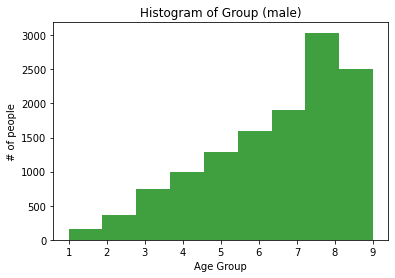

In [48]:
df_male = df_normal1[df_normal1['Gender']==1]
print(len(df_male))
plt.hist(df_male['Group'].values,len(set(df_male['Group'])), density=False, facecolor='g', alpha=0.75)
plt.xlabel('Age Group')
plt.ylabel('# of people')
plt.title('Histogram of Group (male)')
plt.savefig('/Users/hongggenzhang/Desktop/ECG/imgs/histo_male_under22.png')
df_male

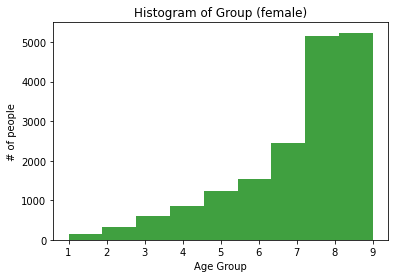

In [49]:
df_female = df_normal1[df_normal1['Gender']==0]
plt.hist(df_female['Group'].values,len(set(df_female['Group'])), density=False, facecolor='g', alpha=0.75)
plt.xlabel('Age Group')
plt.ylabel('# of people')
plt.title('Histogram of Group (female)')
plt.savefig('/Users/hongggenzhang/Desktop/ECG/imgs/histo_female_under22.png')

In [50]:
df_male = df_male.drop(['Gender'], axis=1)
df_female = df_female.drop(['Gender'], axis=1)

## SVM

In [157]:
df_train = pd.read_csv('/Users/hongggenzhang/Desktop/ECG/data/normal/train.csv', sep = ',')
df_train = df_train.drop(['Gender'], axis=1)
X_train = df_train.drop(['Group'], axis=1)
y_train = df_train['Group']

df_test = pd.read_csv('/Users/hongggenzhang/Desktop/ECG/data/normal/test.csv', sep = ',')
df_test = df_test.drop(['Gender'], axis=1)
X_test = df_test.drop(['Group'], axis=1)
y_test = df_test['Group']
df_test

,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,QTc_Friderica_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
0,90.0,58.0,9.0,61.0,67.0,103.0,45.0,406.0,129,406,...,-131.0,351.0,195.0,68.0,-327.0,364.0,101.0,47.0,-1999.0,512.0
1,96.0,-17.0,9.0,53.0,56.0,41.0,58.0,384.0,122,394,...,-63.0,893.0,341.0,0.0,-351.0,827.0,301.0,0.0,-1998.0,1128.0
2,56.0,45.0,3.0,161.0,64.0,88.0,43.0,419.0,133,356,...,-92.0,0.0,58.0,595.0,-166.0,0.0,22.0,306.0,-1021.0,328.0
3,92.0,91.0,8.0,63.0,10.0,101.0,10.0,413.0,131,411,...,-83.0,708.0,400.0,126.0,-581.0,838.0,209.0,103.0,-3506.0,1150.0
4,64.0,-14.0,4.0,136.0,63.0,56.0,70.0,442.0,140,386,...,-126.0,1137.0,375.0,0.0,-283.0,680.0,279.0,0.0,-1571.0,959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,102.0,70.0,6.0,119.0,37.0,105.0,35.0,455.0,145,408,...,-136.0,927.0,556.0,0.0,-507.0,698.0,887.0,0.0,-2482.0,1585.0
2515,98.0,13.0,6.0,54.0,51.0,91.0,78.0,405.0,128,413,...,-170.0,0.0,126.0,771.0,-366.0,0.0,69.0,1134.0,-1937.0,1203.0
2516,70.0,33.0,6.0,121.0,12.0,65.0,32.0,409.0,130,364,...,-87.0,0.0,34.0,717.0,-317.0,0.0,11.0,485.0,-1679.0,496.0
2517,100.0,78.0,8.0,113.0,4.0,98.0,20.0,434.0,137,390,...,-58.0,346.0,219.0,0.0,-151.0,382.0,265.0,0.0,-773.0,647.0


In [158]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [159]:
# X = df_male.drop(['Group'], axis=1)
# Y = df_male['Group']
# InputX = X.values
# InputY = Y.values

In [160]:
#X_train, X_test, y_train, y_test = train_test_split(InputX, InputY, test_size=0.2)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
classifier = SVC(kernel="linear")
#classifier = SVC(kernel="rbf", gamma='auto')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [164]:
y_pred = classifier.predict(X_train)
score = classifier.score(X_train, y_train)
print('accuracy',score)
print(f"Classification report for classifier {classifier}:\n"
    f"{classification_report(y_train, y_pred)}\n")

accuracy 0.6507498897220997
Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       117
         2.0       0.87      0.84      0.86       268
         3.0       0.75      0.81      0.78       536
         4.0       0.71      0.67      0.69       709
         5.0       0.66      0.65      0.66       915
         6.0       0.60      0.59      0.59      1168
         7.0       0.59      0.59      0.59      1388
         8.0       0.61      0.61      0.61      2167
         9.0       0.67      0.68      0.68      1800

    accuracy                           0.65      9068
   macro avg       0.71      0.71      0.71      9068
weighted avg       0.65      0.65      0.65      9068




In [162]:
y_pred = classifier.predict(X_test)
score = classifier.score(X_test, y_test)
print('accuracy',score)
print(f"Classification report for classifier {classifier}:\n"
    f"{classification_report(y_test, y_pred)}\n")

accuracy 0.5486304088924177
Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

         1.0       0.60      0.80      0.68        35
         2.0       0.51      0.59      0.55        68
         3.0       0.54      0.52      0.53       151
         4.0       0.52      0.50      0.51       197
         5.0       0.54      0.51      0.52       251
         6.0       0.52      0.53      0.52       318
         7.0       0.49      0.49      0.49       354
         8.0       0.55      0.54      0.54       628
         9.0       0.63      0.64      0.63       517

    accuracy                           0.55      2519
   macro avg       0.54      0.57      0.55      2519
weighted avg       0.55      0.55      0.55      2519




<Axes: >

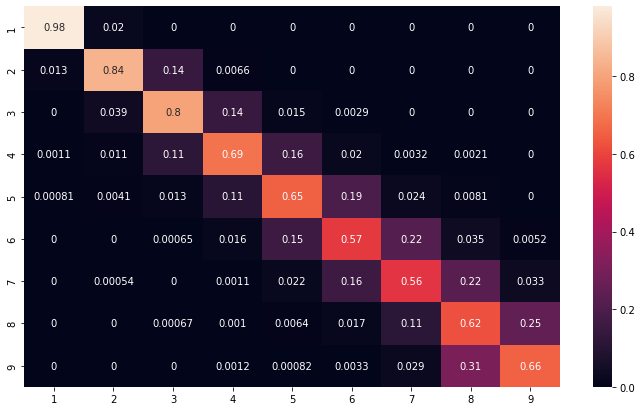

In [156]:
conf = confusion_matrix(y_train,y_pred)
df_cm = pd.DataFrame(conf / np.sum(conf, axis=1)[:, None], index = [i for i in range(1,10)],
                     columns = [i for i in range(1,10)])

plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)

<Axes: >

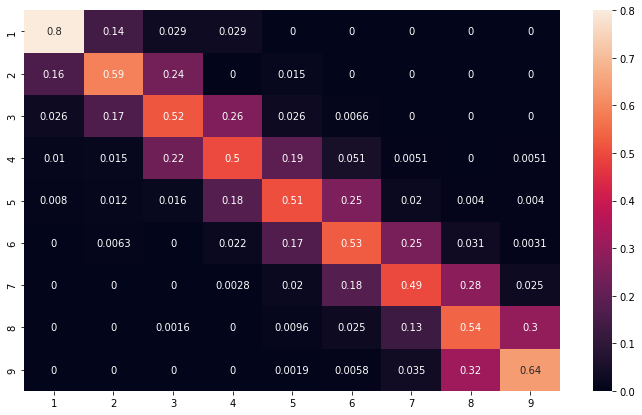

In [163]:
conf = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf / np.sum(conf, axis=1)[:, None], index = [i for i in range(1,10)],
                     columns = [i for i in range(1,10)])

plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)

<Axes: >

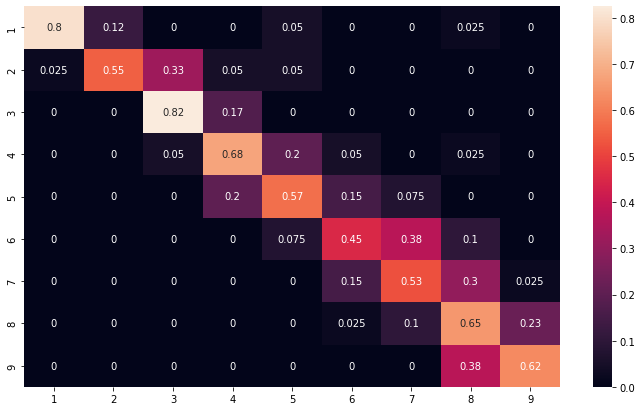

In [99]:
conf = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf / np.sum(conf, axis=1)[:, None], index = [i for i in range(1,10)],
                     columns = [i for i in range(1,10)])

plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)
#plt.savefig('/Users/hongggenzhang/Desktop/ECG/imgs/confu_under22.png',dpi = 200)

In [26]:
df_cm+df_cm

,1,2,3,4,5,6,7,8,9
1,1.176471,0.470588,0.176471,0.000000,0.176471,0.000000,0.000000,0.000000,0.000000
2,0.058824,1.470588,0.441176,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.103226,1.251613,0.490323,0.051613,0.000000,0.000000,0.000000,0.103226
4,0.000000,0.042781,0.299465,1.112299,0.502674,0.021390,0.000000,0.000000,0.021390
5,0.000000,0.007576,0.007576,0.333333,1.159091,0.409091,0.060606,0.000000,0.022727
6,0.000000,0.006410,0.006410,0.025641,0.352564,1.000000,0.442308,0.076923,0.089744
7,0.000000,0.000000,0.000000,0.000000,0.035088,0.375940,0.987469,0.360902,0.240602
8,0.000000,0.000000,0.000000,0.000000,0.006981,0.055846,0.261780,0.666667,1.008726
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000851,0.011059,0.074862,1.913228


<Axes: >

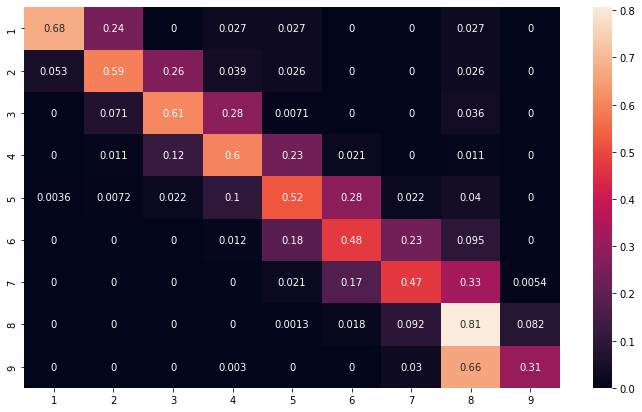

In [86]:
conf = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf / np.sum(conf, axis=1)[:, None], index = [i for i in range(1,10)],
                     columns = [i for i in range(1,10)])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)

<Axes: >

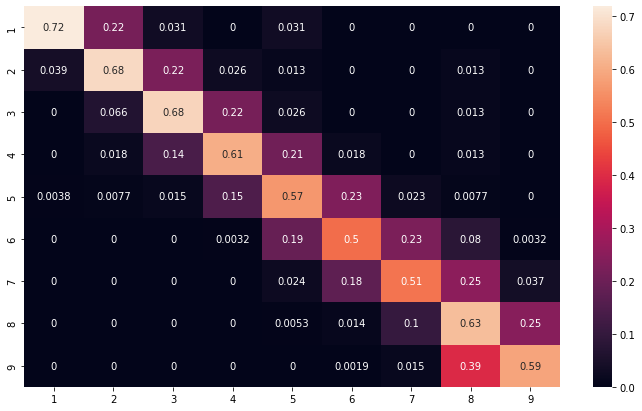

In [102]:
conf = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf / np.sum(conf, axis=1)[:, None], index = [i for i in range(1,10)],
                     columns = [i for i in range(1,10)])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)

## MLP

In [142]:
from sklearn.neural_network import MLPClassifier

In [143]:
mlp = MLPClassifier(
    hidden_layer_sizes=(500,500,200,9),
    max_iter=50,
    alpha=1e-3,
    solver="sgd",
    verbose=False,
    random_state=1,
    learning_rate_init=1e-3,
)

In [144]:
#X_train, X_test, y_train, y_test = train_test_split(InputX, InputY, test_size=0.2)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
score = classifier.score(X_test, y_test)
print('accuracy',score)
print(f"Classification report for classifier {mlp}:\n"
    f"{classification_report(y_test, y_pred)}\n")

/Users/hongggenzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy 0.5833333333333334
Classification report for classifier MLPClassifier(alpha=0.001, hidden_layer_sizes=(500, 500, 200, 9), max_iter=50,
              random_state=1, solver='sgd'):
              precision    recall  f1-score   support

         1.0       0.96      0.60      0.74        40
         2.0       0.71      0.68      0.69        40
         3.0       0.54      0.65      0.59        40
         4.0       0.57      0.62      0.60        40
         5.0       0.48      0.55      0.51        40
         6.0       0.47      0.40      0.43        40
         7.0       0.50      0.50      0.50        40
         8.0       0.46      0.53      0.49        40
         9.0       0.69      0.68      0.68        40

    accuracy                           0.58       360
   macro avg       0.60      0.58      0.58       360
weighted avg       0.60      0.58      0.58       360




In [74]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score(y_pred, y_test)

0.3940031546891491

<Axes: >

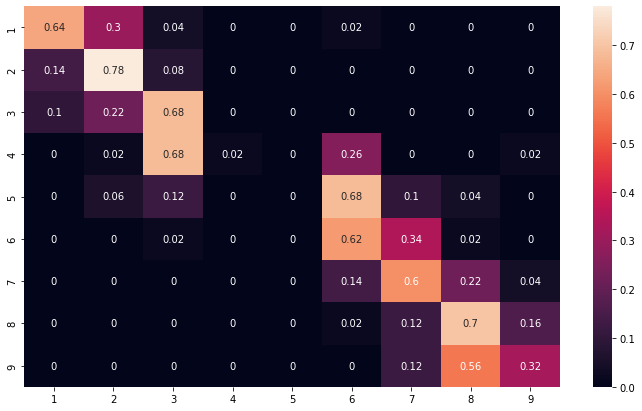

In [31]:
conf = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf / np.sum(conf, axis=1)[:, None], index = [i for i in range(1,10)],
                     columns = [i for i in range(1,10)])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)

## adaboost

In [147]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf_ada = AdaBoostClassifier(n_estimators=200,learning_rate=0.1,  random_state=0)
#clf_ada = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,  random_state=0)
clf_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=0)

In [23]:
feature_importances = clf_ada.feature_importances_

In [26]:
dic_feature_importance = {}
for i in range(len(X.columns)):
    dic_feature_importance[X.columns[i]] = feature_importances[i]
sorted(dic_feature_importance.items(), key=lambda x:x[1], reverse=True)

[('QRS_Duration__ms_C', 0.16276765503498322),
 ('RR_Interval_C', 0.07799462678013935),
 ('T_Peak_Amplitude_C_V1', 0.07494089457441858),
 ('R_Duration_C_V5', 0.07412514658401385),
 ('Q_T_Interval_C', 0.044553468422652294),
 ('T_Peak_Amplitude_C_V2', 0.029443035085532244),
 ('R_Duration_C_V4', 0.028707330630135593),
 ('R_Peak_Amplitude_C_V2', 0.026947861880017635),
 ('R_Duration_C_I', 0.021963943170700374),
 ('PR_Interval_C', 0.020621862671118867),
 ('R_Axis_C', 0.0199840696210086),
 ('T_Peak_Amplitude_C_V3', 0.016404405438484954),
 ('R_Duration_C_V6', 0.015113105892347026),
 ('S_Duration_C_V1', 0.014906286342654822),
 ('T_Area_C_V2', 0.014387148123698538),
 ('P_Peak_Amplitude_C_V1', 0.011615729451317214),
 ('R_Peak_Amplitude_C_V3', 0.011497864471439941),
 ('P_Peak_Amplitude_C_I', 0.010295518348978492),
 ('S_Duration_C_V2', 0.009782566280941627),
 ('Ventricular_Rate_C', 0.008524547522812113),
 ('QTc_Friderica_C', 0.008062689153692843),
 ('P_Peak_Amplitude_C_aVL', 0.007947499285312413),
 

In [148]:
y_pred = clf_ada.predict(X_test)
score = clf_ada.score(X_test, y_test)
print('accuracy',score)
print(f"Classification report (9 group) for classifier {clf_ada}:\n"
    f"{classification_report(y_test, y_pred)}\n")

accuracy 0.42777777777777776
Classification report (9 group) for classifier AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=0):
              precision    recall  f1-score   support

         1.0       0.90      0.23      0.36        40
         2.0       0.50      0.55      0.52        40
         3.0       0.52      0.38      0.43        40
         4.0       0.37      0.53      0.43        40
         5.0       0.36      0.55      0.44        40
         6.0       0.45      0.60      0.52        40
         7.0       0.33      0.38      0.35        40
         8.0       0.32      0.38      0.34        40
         9.0       0.79      0.28      0.41        40

    accuracy                           0.43       360
   macro avg       0.50      0.43      0.42       360
weighted avg       0.50      0.43      0.42       360




<Axes: >

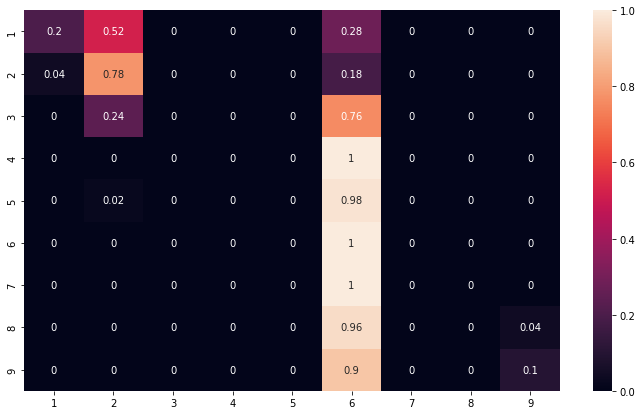

In [34]:
conf = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf / np.sum(conf, axis=1)[:, None], index = [i for i in range(1,10)],
                     columns = [i for i in range(1,10)])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)